# MatSE580 Guest Lecture 1
## Outline

In this guest lecture, we will cover:
1. [Overview of databases and pycalphad-xml](#Overview)
2. [Ta-O with associate model and ionic model: Ta-O system](#Ta-O-example)
3. [Databases with MQMQA](#MQMQA)

### Overview

#### Databases

CALPHAD database files are made by researchers who model the Gibbs energy functions. Now pycalphad supports 

* The Thermo-Calc DataBase (TDB) format, usually with the file extension `.tdb`
* The ChemSage database format, usually with the file extension `.dat`
* The XML database format, with the file extension `.xml`

The database can be load in and convert to .xml format through following code

```python
from pycalphad import Database
db = Database("path/to/database.tdb")
db.to_file("path/to/database.xml")
```

#### Installation of pycalphad-xml

***pycalphad-xml*** is XML database plugin for PyCalphad (https://github.com/pycalphad/pycalphad-xml)

PyCalphad version 0.10.1 or later will automatically detect this packge as a plugin

```pip install pycalphad-xml```

### Ta-O Example: database with associate model and ionic model

Reference: Meisner, Kevin J., Rahim Zaman, and Bi-Cheng Zhou. "Thermodynamic modeling of the Ta-O system." Calphad 76 (2022): 102391. 

doi: https://doi.org/10.1016/j.calphad.2022.102391

#### Database conversion

In [1]:
from pycalphad import Database
dbf_am = Database("Ta_O_Associate_Solution.TDB")
dbf_am.to_file("Ta_O_Associate_Solution.xml")

In [ ]:
#Try to convert ionic liquid database 'Ta_O_Ionic_Liquid.TDB' to xml



#### Liquid model

Phase diagram: associate model

<img src="../assets/Ta-O-am-PD.jpg" alt="Ta-O-AssociateModel" />

Phase model: associate model

<img src="../assets/Ta-O-am-PhaseModel.png" alt="Ta-O-AssociateModel" />

Phase diagram: ionic model

<img src="../assets/Ta-O-Ionic-PD.jpg" alt="Ta-O-IonicModel" />

<img src="../assets/Ta-O-Ionic-PhaseModel1.png" alt="Ta-O-IonicModel1" width="200"/>
<img src="../assets/Ta-O-Ionic-PhaseModel2.png" alt="Ta-O-IonicModel2" />

['GAS', 'IONIC_LIQ', 'BCC_A2', 'FCC_A1', 'HCP_A3', 'TA2O5A', 'TA2O5B']


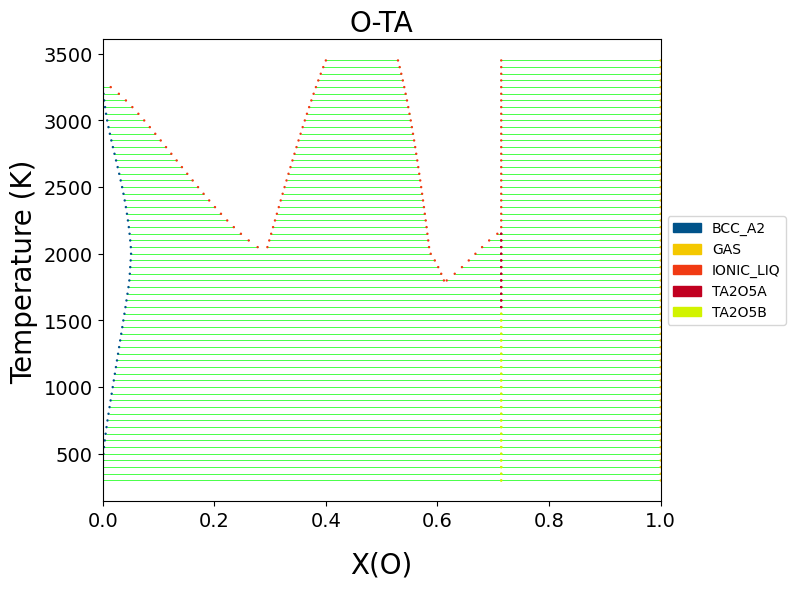

In [4]:
from pycalphad import Database, binplot, equilibrium, variables as v
import matplotlib.pyplot as plt
comps = ['TA', 'O', 'VA']
dbf=Database('Ta_O_Ionic_Liquid.TDB')
phases = list(dbf.phases.keys())
print(phases)
conds = {v.N: 1.0, v.P: 101325, v.T: (300, 3500, 50), v.X('O'): (0, 1, 0.01)}
# Plot setting
fig = plt.figure(figsize=(9,6))
axes = fig.gca()
# Compute the phase diagram and plot it on the existing axes using the `plot_kwargs={'ax': axes}` keyword argument
binplot(dbf, comps, phases, conds, plot_kwargs={'ax': axes})

plt.show()


### MQMQA

Reference: Ocadiz-Flores, Jaen Alonso, et al. "Thermodynamic assessment of the LiF-NiF2, NaF-NiF2 and KF-NiF2 systems." The Journal of Chemical Thermodynamics 121 (2018): 17-26.

doi: https://doi.org/10.1016/j.jct.2018.01.023

In [6]:
from pycalphad import Database
dbf = Database("FINA.DAT")
dbf.to_file("NiF2-FLiNaK.xml")

#### Define coordination number

<img src="../assets/MQMQA-CN.png" alt="MQMQA-CN" />

In database:
```
    <Parameter type="MQMZ">
      <ConstituentArray>
        <Site refid="0">
          <Constituent refid="K+1.0"/>
          <Constituent refid="NI+2.0"/>
        </Site>
        <Site refid="1">
          <Constituent refid="F-1.0"/>
          <Constituent refid="F-1.0"/>
        </Site>
      </ConstituentArray>
      <Coordinations>3.0 6.0 3.0 3.0</Coordinations>
    </Parameter>
```

#### Excess Gibbs energy in MQMQA

<img src="../assets/MQMQA-M1.png" alt="MQMQA-M1" width=400 />
<img src="../assets/MQMQA-M2.png" alt="MQMQA-M2" width=500 />

In database:
```
<Parameter type="MQMX">-2929.0<ConstituentArray><Site refid="0"><Constituent refid="LI+1.0"/><Constituent refid="NI+2.0"/></Site><Site refid="1"><Constituent refid="F-1.0"/><Constituent refid="F-1.0"/></Site></ConstituentArray><MixingCode type="G"/><Exponents>0 0 0 0</Exponents></Parameter>

<Parameter type="MQMX">-2092.0<ConstituentArray><Site refid="0"><Constituent refid="LI+1.0"/><Constituent refid="NI+2.0"/></Site><Site refid="1"><Constituent refid="F-1.0"/><Constituent refid="F-1.0"/></Site></ConstituentArray><MixingCode type="G"/><Exponents>1 0 0 0</Exponents></Parameter>

<Parameter type="MQMX">-12134.0<ConstituentArray><Site refid="0"><Constituent refid="LI+1.0"/><Constituent refid="NI+2.0"/></Site><Site refid="1"><Constituent refid="F-1.0"/><Constituent refid="F-1.0"/></Site></ConstituentArray><MixingCode type="G"/><Exponents>0 1 0 0</Exponents></Parameter>
```